## Access Obs4MIPs and CMIP data via ESGF

In [1]:
%%time
from intake_esgf import ESGFCatalog
import matplotlib.pyplot as plt

CPU times: user 2.49 s, sys: 111 ms, total: 2.6 s
Wall time: 717 ms


In [20]:
%%time
from intake_esgf import supported_projects
print(supported_projects())

['cmip6', 'cmip5', 'cmip3', 'obs4mips', 'drcdp']
CPU times: user 49 μs, sys: 6 μs, total: 55 μs
Wall time: 57.9 μs


---
### Access CMIP

On the ESGF webpage (https://esgf.github.io/software.html), [intake-esgf](https://github.com/esgf2-us/intake-esgf) is recommended. An example is shown below how to access data.

In [16]:
%%time
cat = ESGFCatalog()

CPU times: user 897 μs, sys: 0 ns, total: 897 μs
Wall time: 620 μs


Perform a search() to populate the catalog.

In [18]:
%%time
cat.variable_info("air temperature surface")

CPU times: user 45.5 ms, sys: 4.56 ms, total: 50.1 ms
Wall time: 5.18 s


,variable_units,variable_long_name,cf_standard_name
variable_id,,,
hfls,W m-2,Surface Upward Latent Heat Flux,surface_upward_latent_heat_flux
hfss,W m-2,Surface Upward Sensible Heat Flux,surface_upward_sensible_heat_flux
rlds,W m-2,Surface Downwelling Longwave Radiation,surface_downwelling_longwave_flux_in_air
rsds,W m-2,Surface Downwelling Shortwave Radiation,surface_downwelling_shortwave_flux_in_air
sfcWind,m s-1,Near-Surface Wind Speed,wind_speed
ta,K,Air Temperature,air_temperature
tas,K,Near-Surface Air Temperature,air_temperature
tasmax,K,Daily Maximum Near-Surface Air Temperature,air_temperature
tasmin,K,Daily Minimum Near-Surface Air Temperature,air_temperature


In [4]:
%%time
cat.search(variable_id="tas",experiment_id="historical")

   Searching indices:   0%|          |0/2 [       ?index/s]

CPU times: user 1.27 s, sys: 66.3 ms, total: 1.34 s
Wall time: 5.99 s


Summary information for 1687 results:
mip_era                                                     [CMIP6]
activity_drs                                                 [CMIP]
institution_id    [IPSL, NASA-GISS, NCAR, MPI-M, MRI, CNRM-CERFA...
source_id         [IPSL-CM6A-LR, GISS-E2-1-H, CESM2, GISS-E2-1-G...
experiment_id                                          [historical]
member_id         [r9i1p1f1, r7i1p1f1, r4i1p1f1, r27i1p1f1, r5i1...
table_id          [ImonGre, ImonAnt, Amon, day, 3hr, 6hrPlevPt, ...
variable_id                                                   [tas]
grid_label                             [grg, gra, gr, gn, gr1, gr2]
dtype: object

In [5]:
%%time
cat.search(
    variable_id="tas",
    experiment_id="historical",
    source_id="CanESM5",
    member_id="r1i1p1f1",
    table_id="Amon"
)

   Searching indices:   0%|          |0/2 [       ?index/s]

CPU times: user 24.7 ms, sys: 3.11 ms, total: 27.8 ms
Wall time: 1.04 s


Summary information for 1 results:
mip_era                [CMIP6]
activity_drs            [CMIP]
institution_id         [CCCma]
source_id            [CanESM5]
experiment_id     [historical]
member_id           [r1i1p1f1]
table_id                [Amon]
variable_id              [tas]
grid_label                [gn]
dtype: object

In [6]:
%%time
dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/2 [       ?index/s]

Adding cell measures:   0%|          |0/1 [     ?dataset/s]

CPU times: user 387 ms, sys: 61.1 ms, total: 449 ms
Wall time: 3.76 s


**However this does not happen lazy!**

In [7]:
%%time
dsd["tas"]

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 4.29 μs


<xarray.Dataset> Size: 65MB
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 65MB ...
    areacella  (lat, lon) float32 33kB ...
Attributes: (12/55)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    activity_drs:                CMIP
    member_id:                   r1i1p1f1

CPU times: user 371 ms, sys: 71.1 ms, total: 442 ms
Wall time: 442 ms


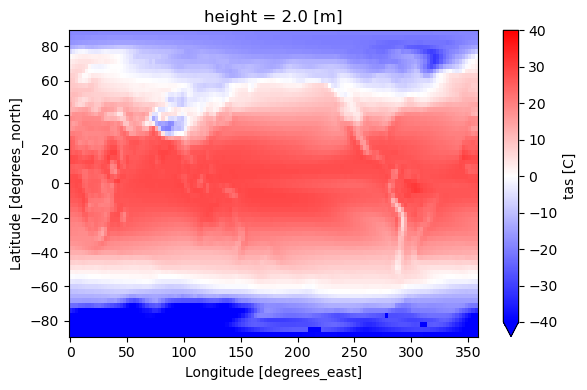

In [8]:
%%time
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ds_plot = dsd["tas"]["tas"].mean(dim="time") - 273.15  # to [C]
ds_plot.plot(ax=ax, cmap="bwr", vmin=-40, vmax=40, cbar_kwargs={"label": "tas [C]"})

---
### Lets try intake

https://github.com/intake/intake

https://github.com/intake/intake-esm/tree/main

This works lazy but is slow. :/

In [9]:
%%time
import intake

CPU times: user 40 ms, sys: 5.09 ms, total: 45.1 ms
Wall time: 44 ms


In [10]:
%%time
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
cat

CPU times: user 999 ms, sys: 345 ms, total: 1.34 s
Wall time: 8.49 s


,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [11]:
%%time
cat.keys_info()

CPU times: user 607 ms, sys: 34.8 ms, total: 642 ms
Wall time: 641 ms


,activity_id,institution_id,source_id,experiment_id,table_id,grid_label
key,,,,,,
AerChemMIP.AS-RCEC.TaiESM1.histSST.AERmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST,AERmon,gn
AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.AERmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST-piNTCF,AERmon,gn
AerChemMIP.AS-RCEC.TaiESM1.histSST-piNTCF.CFmon.gn,AerChemMIP,AS-RCEC,TaiESM1,histSST-piNTCF,CFmon,gn
AerChemMIP.BCC.BCC-ESM1.hist-piAer.SImon.gn,AerChemMIP,BCC,BCC-ESM1,hist-piAer,SImon,gn
AerChemMIP.BCC.BCC-ESM1.histSST.AERmon.gn,AerChemMIP,BCC,BCC-ESM1,histSST,AERmon,gn
...,...,...,...,...,...,...
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Lmon.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Lmon,gn
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Ofx.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Ofx,gn
ScenarioMIP.UA.MCM-UA-1-0.ssp585.Omon.gn,ScenarioMIP,UA,MCM-UA-1-0,ssp585,Omon,gn


In [12]:
%%time
cat_subset = cat.search(
    variable_id="tas",
    experiment_id="historical",
    source_id="CanESM5",
    member_id="r1i1p1f1",
    table_id="Amon"
)

cat_subset

CPU times: user 138 ms, sys: 1.83 ms, total: 140 ms
Wall time: 139 ms


,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
zstore,1
dcpp_init_year,0


In [13]:
%%time
data_dict = cat_subset.to_dataset_dict()
data_dict["CMIP.CCCma.CanESM5.historical.Amon.gn"]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


CPU times: user 196 ms, sys: 24.9 ms, total: 220 ms
Wall time: 27.3 s


<xarray.Dataset> Size: 65MB
Dimensions:         (lat: 64, bnds: 2, lon: 128, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 1kB dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 2kB dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 65MB dask.array<chunksize=(1, 1, 600, 64, 128), meta=np.ndarray>
Attributes: (12/69)
    CCCma_model_hash:                 3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:               rc3-pictrl
    CCCma_pycmor_hash:                33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                      rc3.1-his01
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/his...
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

In [14]:
%%time
ds = cat_subset.to_dask()
ds

CPU times: user 45.8 ms, sys: 3.4 ms, total: 49.2 ms
Wall time: 26.2 s


<xarray.Dataset> Size: 65MB
Dimensions:         (lat: 64, bnds: 2, lon: 128, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    height          float64 8B ...
  * lat             (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 1kB dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 2kB dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:...
    time_bnds       (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 65MB dask.array<chunksize=(1, 1, 600, 64, 128), meta=np.ndarray>
Attributes: (12/69)
    CCCma_model_hash:                 3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:               rc3-pictrl
    CCCma_pycmor_hash:                33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                      rc3.1-his01
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    ...                               ...
    intake_esm_attrs:variable_id:     tas
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/his...
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

CPU times: user 411 ms, sys: 215 ms, total: 626 ms
Wall time: 3.65 s


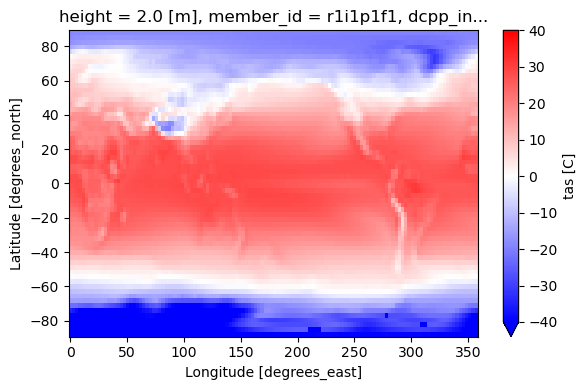

In [15]:
%%time
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ds_plot = ds["tas"].mean(dim="time") - 273.15  # to [C]
ds_plot.plot(ax=ax, cmap="bwr", vmin=-40, vmax=40, cbar_kwargs={"label": "tas [C]"})